In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

from keras import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


The data is cleaned and ready for the training phase. There are many methods used in classification tasks. I'll test some of the most common algorithms and compare the results.  
For performance evaluation I'll use the confusion matrix and the well-known Precision, Recall and F1-score.

In [2]:
data = pd.read_csv('./../data/processed/data.csv')

In [3]:
data['fake'].value_counts()

0    21191
1    17453
Name: fake, dtype: int64

Because the dataset is not perfectly balanced, I'll used a stratified train_test_split. This will result in having the same proportion of fake articles in the training and test set.  
Since the dataset is relatively small, I'll set the training set size to be of 30% of the whole dataset.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['fake'], test_size = 0.3, stratify = data['fake'])

Now I have to extract numerical features from the dataset of string tokens. One way to do this is using **TF-IDF** term weighting scheme which is a technique of calculating the importance of a word in a given corpus.
<br/><br/>

<center>tf-idf(w,d,D) = tf(w,d) * idf(w,D)</center>
<br/>
<center>tf(w,d) = log(1 + f(w,d))</center>
<br/>
<center>idf(w,D) = log($\frac{N}{f(w,D)}$)</center>
<br/>
where:

- w - a given word from an article  
- d - a given article from the dataset
- D - the whole collection of articles
- N - the total number of articles in the dataset  
- f(w,d) - the frequency of word w in article d
- f(w,D) - the frequency of word w in all articles

**TF** (term frequency) increases the weight of the terms (words) that occur more frequently in the document.  
<br/>
**IDF** (inverse document frequency) diminishes the weight of the terms that occur in all the documents of corpus and, at the same time, increases the weight of the terms that occur in rare documents across the corpus.  
<br/>
What **TF-IDF** does is that it tries to offer more weight to words that have a high number of occurences in some documents, but penalizes the words that appear frequently in very many documents. Words can be relevant if they appear frequently in rare situations. If a word is very common accross too many documents, their importance decreases, because they do not bring much information (similar to what stop words offer)

In [5]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

Multinomial Naive Bayes classifier evaluation report (Precision, Recall, F1)

              precision    recall  f1-score   support

           0     0.9330    0.9681    0.9502      6358
           1     0.9594    0.9156    0.9370      5236

    accuracy                         0.9444     11594
   macro avg     0.9462    0.9418    0.9436     11594
weighted avg     0.9449    0.9444    0.9442     11594

Confusion matrix


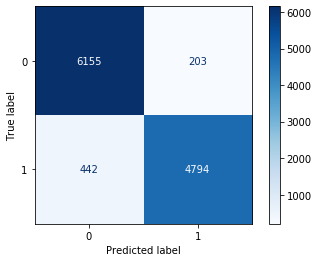

In [6]:
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train_vect, y_train)
mnb_pred = mnb_clf.predict(X_test_vect)
mnb_cr = classification_report(y_test, mnb_pred, digits = 4)

print("Multinomial Naive Bayes classifier evaluation report (Precision, Recall, F1)\n")
print(mnb_cr)

mnb_cm = confusion_matrix(y_test, mnb_pred)
print("Confusion matrix")
plot_confusion_matrix(mnb_clf, X_test_vect, y_test, cmap = 'Blues', values_format='d')
plt.show()

The **Multinomial Naive Bayes** classifer has a pretty good F1-score. The confusion matrix tells us the model has some difficulties with false negatives (fake news labeled as true news). Naive Bayes is known to perform better on snipets of text. This is why for full-length texts it's better to use other algorithms (for example SVMs).

Random forest classifier evaluation report (Precision, Recall, F1)

              precision    recall  f1-score   support

           0     0.9766    0.9863    0.9815      6358
           1     0.9832    0.9714    0.9772      5236

    accuracy                         0.9796     11594
   macro avg     0.9799    0.9788    0.9793     11594
weighted avg     0.9796    0.9796    0.9795     11594

Confusion matrix


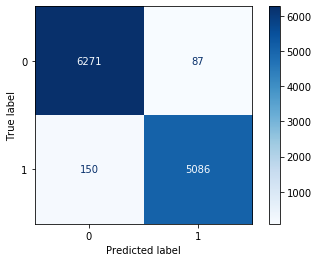

In [9]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_vect, y_train)
rf_pred = rf_clf.predict(X_test_vect)
rf_cr = classification_report(y_test, rf_pred, digits = 4)

print("Random forest classifier evaluation report (Precision, Recall, F1)\n")
print(rf_cr)

rf_cm = confusion_matrix(y_test, rf_pred)
print("Confusion matrix")
plot_confusion_matrix(rf_clf, X_test_vect, y_test, cmap='Blues', values_format='d')
plt.show()

Results show us that **Random Forest** classifier achieves a better f1-score than MNB. We can notice that this model also has a greater number of false negatives than false positives. Random Forest is usually suitable for high dimensional data which makes it a good candidate for fake news detection.

Logistic regression evaluation report (Precision, Recall, F1)

              precision    recall  f1-score   support

           0     0.9821    0.9896    0.9858      6358
           1     0.9873    0.9780    0.9826      5236

    accuracy                         0.9844     11594
   macro avg     0.9847    0.9838    0.9842     11594
weighted avg     0.9844    0.9844    0.9844     11594

Confusion matrix


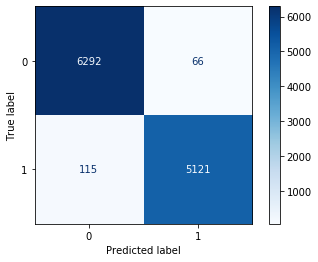

In [10]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_vect,y_train)
lr_pred = lr_clf.predict(X_test_vect)
lr_cr = classification_report(y_test, lr_pred, digits = 4)

print("Logistic regression evaluation report (Precision, Recall, F1)\n")
print(lr_cr)

lr_cm = confusion_matrix(y_test, lr_pred)
print("Confusion matrix")
plot_confusion_matrix(lr_clf, X_test_vect, y_test, cmap = 'Blues', values_format='d')
plt.show()

**Logistic regression** achieves slightly better results than Random Forest. The same observation regarding the proportion of false negatives applies in this case, too. Because it's fast to train and can offer good results in text classification, Logistic regression proves to be a good solution.

Support vector classifier evaluation report (Precision, Recall, F1)

              precision    recall  f1-score   support

           0     0.9904    0.9931    0.9918      6358
           1     0.9916    0.9883    0.9900      5236

    accuracy                         0.9909     11594
   macro avg     0.9910    0.9907    0.9909     11594
weighted avg     0.9909    0.9909    0.9909     11594

Confusion matrix


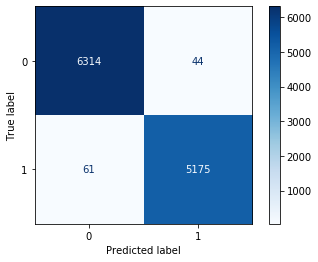

In [14]:
svm_clf = LinearSVC(C=1)
svm_clf.fit(X_train_vect, y_train)
svm_pred = svm_clf.predict(X_test_vect)
svm_cr = classification_report(y_test, svm_pred, digits = 4)

print("Support vector classifier evaluation report (Precision, Recall, F1)\n")
print(svm_cr)

svm_cm = confusion_matrix(y_test, svm_pred)
print("Confusion matrix")
plot_confusion_matrix(svm_clf, X_test_vect, y_test, cmap = 'Blues', values_format='d')
plt.show()

**Linear support vector classifier** achieves great results and confirms that is one of the best algorithms used for (lengthy) text classification. 

In [ ]:
def build_model():
    model = Sequential()
    model.add(Dense(512, input_dim=X_train_vect.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

estimator = KerasClassifier(build_fn=build_model, epochs=4, batch_size=128)
estimator.fit(X_train_vect, y_train)

Epoch 1/4
27050/27050 [==============================] - 280s 10ms/step - loss: 0.1038 - accuracy: 0.9638
Epoch 2/4
25472/27050 [===========================>..] - ETA: 16s - loss: 0.0059 - accuracy: 0.9985

Neural network evaluation report (Precision, Recall, F1)

              precision    recall  f1-score   support

           0     0.9870    0.9945    0.9908      6358
           1     0.9933    0.9841    0.9887      5236

    accuracy                         0.9898     11594
   macro avg     0.9901    0.9893    0.9897     11594
weighted avg     0.9898    0.9898    0.9898     11594



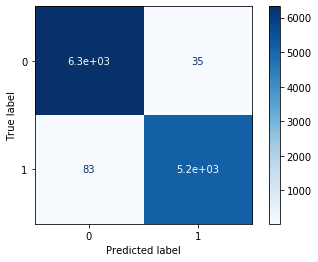

In [41]:
nn_pred = estimator.predict(X_test_vect)
nn_cr = classification_report(y_test, nn_pred, digits = 4)
print("Neural network evaluation report (Precision, Recall, F1)\n")
print(nn_cr)

nn_cm = confusion_matrix(y_test, nn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = nn_cm, display_labels = [0,1])
disp = disp.plot(cmap = "Blues")
plt.show()

We've seen how algorithms like Multinomial Naive Bayes, Random Forest, Logistic Regression or Linear Suport Vector classifier perform in a fake news detection task. They have all achieved very good results, SVC being the most performant. At the same time we've seen that a pretty small artificial neural network can achieve a nearly perfect score.  
This makes me think that the dataset has to be a very easy one. It probably contains more subtle biases (not as explicit as the occurence of "Reuters" in almost all true articles).  
I would have wanted to try more complicated algorithms, hyperparameter tuning, but it make much more sense to do it on a more difficult dataset. Therefore, a second part of this project will focus on another dataset that will hopefully offer more challenges.